<a href="https://colab.research.google.com/github/victorsobottka/bse-thesis-synthetic-data/blob/main/2_2_LLM_Few_Shot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **🧠 Few-Shot Approach**

## **🗝️ Get Secrets**

Register on DeepSeek API to get an API Key.

In [ ]:
from google.colab import userdata
DEEPSEEK_API_KEY = userdata.get('DEEPSEEK_API_KEY')

## **🐋 Calling DeepSeek API**

In [ ]:
import requests

url = "https://api.deepseek.com/v1/chat/completions"
headers = {
    "Authorization": f"Bearer {DEEPSEEK_API_KEY}",
    "Content-Type": "application/json"
}
data = {
    "model": "deepseek-chat",
    "messages": [
        {"role": "system", "content": "Eres un asistente útil."},
        {"role": "user", "content": "Generate synthetic data simulating the trend of NVIDIA's closing stock price over 100 trading days, starting from 2020-01-01.\n"

                                    "Below is a sample of real closing prices at the beginning of 2020:\n"

                                    """Date,Close
                                      2020-01-02,5.97
                                      2020-01-03,5.88
                                      2020-01-06,5.90
                                      2020-01-07,5.97
                                      2020-01-08,5.98
                                      2020-01-09,6.05
                                      2020-01-10,6.08
                                      2020-01-13,6.27
                                      2020-01-14,6.16
                                      2020-01-15,6.11
                                      2020-01-16,6.20
                                      2020-01-17,6.21
                                      2020-01-21,6.17
                                      2020-01-22,6.23
                                      2020-01-23,6.29
                                      2020-01-24,6.24
                                      2020-01-27,5.98
                                      2020-01-28,6.17
                                      2020-01-29,6.11
                                      2020-01-30,6.12"""

                                    "The initial closing price on 2020-01-01 is 5.7\n."
                                    "Exclude weekends (Saturdays and Sundays) from the generated dates.\n"
                                    "Incorporate realistic daily fluctuations to reflect stock market volatility.\n"
                                    "Output format: CSV with the following headers — Date,Close.\n"
                                    "Use the date format: YYYY-MM-DD.\n"
                                    }
    ],
    "temperature": 0.7
}

response = requests.post(url, headers=headers, json=data)
print(response.json())


{'id': '0609e616-5fe3-4c30-ab65-e8fe7221a76c', 'object': 'chat.completion', 'created': 1747586274, 'model': 'deepseek-chat', 'choices': [{'index': 0, 'message': {'role': 'assistant', 'content': "Here's a synthetic dataset simulating NVIDIA's closing stock price over 100 trading days starting from 2020-01-01, with realistic daily fluctuations while excluding weekends:\n\n```csv\nDate,Close\n2020-01-01,5.70\n2020-01-02,5.97\n2020-01-03,5.88\n2020-01-06,5.90\n2020-01-07,5.97\n2020-01-08,5.98\n2020-01-09,6.05\n2020-01-10,6.08\n2020-01-13,6.27\n2020-01-14,6.16\n2020-01-15,6.11\n2020-01-16,6.20\n2020-01-17,6.21\n2020-01-21,6.17\n2020-01-22,6.23\n2020-01-23,6.29\n2020-01-24,6.24\n2020-01-27,5.98\n2020-01-28,6.17\n2020-01-29,6.11\n2020-01-30,6.12\n2020-01-31,6.25\n2020-02-03,6.32\n2020-02-04,6.45\n2020-02-05,6.52\n2020-02-06,6.48\n2020-02-07,6.55\n2020-02-10,6.62\n2020-02-11,6.58\n2020-02-12,6.71\n2020-02-13,6.65\n2020-02-14,6.73\n2020-02-18,6.80\n2020-02-19,6.88\n2020-02-20,6.95\n2020-02-21,6

## **🛜 Getting the Response**

In [ ]:
# Debugging response
if response.status_code == 200:
    result = response.json()
    answer = result['choices'][0]['message']['content']
    print(answer)
else:
    print(f"Error {response.status_code}:")
    print(response.text)


Here's a synthetic dataset simulating NVIDIA's closing stock price over 100 trading days starting from 2020-01-01, with realistic daily fluctuations while excluding weekends:

```csv
Date,Close
2020-01-01,5.70
2020-01-02,5.97
2020-01-03,5.88
2020-01-06,5.90
2020-01-07,5.97
2020-01-08,5.98
2020-01-09,6.05
2020-01-10,6.08
2020-01-13,6.27
2020-01-14,6.16
2020-01-15,6.11
2020-01-16,6.20
2020-01-17,6.21
2020-01-21,6.17
2020-01-22,6.23
2020-01-23,6.29
2020-01-24,6.24
2020-01-27,5.98
2020-01-28,6.17
2020-01-29,6.11
2020-01-30,6.12
2020-01-31,6.25
2020-02-03,6.32
2020-02-04,6.45
2020-02-05,6.52
2020-02-06,6.48
2020-02-07,6.55
2020-02-10,6.62
2020-02-11,6.58
2020-02-12,6.71
2020-02-13,6.65
2020-02-14,6.73
2020-02-18,6.80
2020-02-19,6.88
2020-02-20,6.95
2020-02-21,6.89
2020-02-24,6.82
2020-02-25,6.75
2020-02-26,6.68
2020-02-27,6.55
2020-02-28,6.42
2020-03-02,6.50
2020-03-03,6.45
2020-03-04,6.53
2020-03-05,6.47
2020-03-06,6.35
2020-03-09,6.22
2020-03-10,6.30
2020-03-11,6.18
2020-03-12,6.05
2020-0

## **📃Get CSV from the Response**

In [ ]:
import re
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO

csv_text = ""

if response.status_code == 200:
    content = response.json()["choices"][0]["message"]["content"]
    # Extract the CSV content inside triple backticks ```csv ... ```
    match = re.search(r"```csv\s+(.*?)```", content, re.DOTALL)
    if match:
        csv_text = match.group(1).strip()
        # print(csv_text)

    else:
        print("CSV block not found.")
else:
    print(f"Error {response.status_code}:")
    print(response.text)


df_generated = pd.read_csv(StringIO(csv_text))
df_generated['Date'] = pd.to_datetime(df_generated['Date'])
df_generated

,Date,Close
0,2020-01-01,5.70
1,2020-01-02,5.97
2,2020-01-03,5.88
3,2020-01-06,5.90
4,2020-01-07,5.97
...,...,...
99,2020-05-22,7.95
100,2020-05-26,8.02
101,2020-05-27,8.10
102,2020-05-28,8.18


## **📉 Data Visualization**

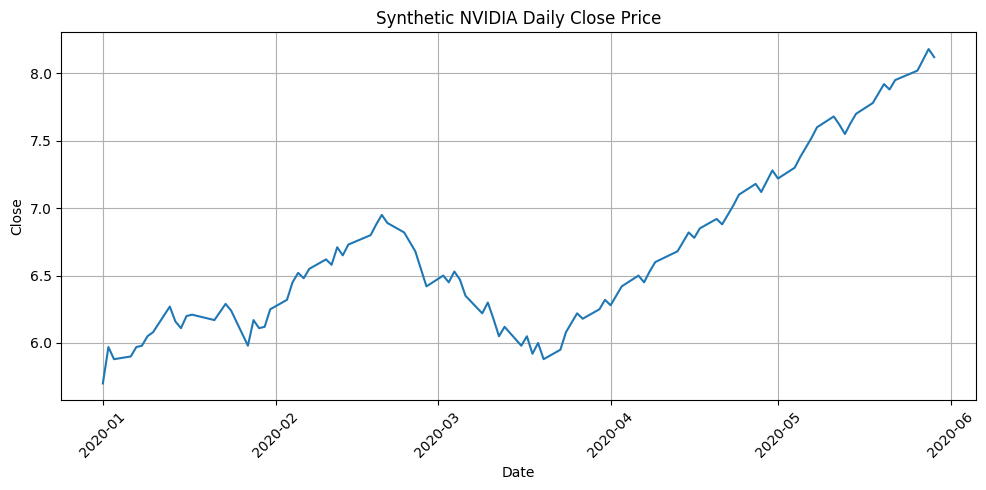

In [ ]:
# Plot
plt.figure(figsize=(10, 5))
plt.plot(df_generated['Date'], df_generated['Close'])
plt.title("Synthetic NVIDIA Daily Close Price")
plt.xlabel("Date")
plt.ylabel("Close")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## **🌍 Compare with real data**

### **💾 Connect to Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

ValueError: mount failed

### **🌍 Load Real Data**

In [ ]:
import pandas as pd

# Load the data
file_path = "/content/drive/MyDrive/Colab Notebooks/thesis/nvidia_2020_2021.csv"
df_nvda = pd.read_csv(file_path, skiprows=[1, 2], header=0)
df_nvda.columns = ["Date", "Open", "High", "Low", "Close", "Volume"]

number_of_rows = 100

# Display the first x rows
print(df_nvda.head(number_of_rows))

In [ ]:

df_real = df_nvda.head(number_of_rows)
df_real['Date'] = pd.to_datetime(df_real['Date'])
df_real = df_real[(df_real['Date'].dt.year == 2020)]
df_real = df_real.head(100)
df_real.head()


In [ ]:
# Plot
plt.figure(figsize=(10, 5))
plt.plot(df_generated['Date'], df_generated['Close'], label='Synthetic')
plt.plot(df_real['Date'], df_real['Close'], linestyle="--", label='Real')
plt.title("Synthetic NVIDIA Daily Close Price")
plt.xlabel("Date")
plt.ylabel("Close")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()


# Add legend
plt.legend()
plt.show()

